In [38]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../data/yellow_tripdata_2020-04.csv")
#df = pd.read_csv("../data/yellow_tripdata_2020-04.csv", nrows=100)

df

/var/folders/wg/62v23f191zsbtpgk23vhgv2h0000gn/T/ipykernel_26380/1603510056.py:6: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/yellow_tripdata_2020-04.csv")


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2020-04-01 00:41:22,2020-04-01 01:01:53,1.0,1.20,1.0,N,41,24,2,5.50,0.5,0.5,0.00,0.00,0.3,6.80,0.0,NaN
1,1,2020-04-01 00:56:00,2020-04-01 01:09:25,1.0,3.40,1.0,N,95,197,1,12.50,0.5,0.5,2.75,0.00,0.3,16.55,0.0,NaN
2,1,2020-04-01 00:00:26,2020-04-01 00:09:25,1.0,2.80,1.0,N,237,137,1,10.00,3.0,0.5,1.00,0.00,0.3,14.80,2.5,NaN
3,1,2020-04-01 00:24:38,2020-04-01 00:34:38,0.0,2.60,1.0,N,68,142,1,10.00,3.0,0.5,1.00,0.00,0.3,14.80,2.5,NaN
4,2,2020-04-01 00:13:24,2020-04-01 00:18:26,1.0,1.44,1.0,Y,263,74,1,6.50,0.5,0.5,3.00,0.00,0.3,13.30,2.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238068,2,2020-04-30 23:30:00,2020-04-30 23:39:00,NaN,2.02,NaN,NaN,238,75,0,8.46,0.0,0.5,0.00,0.00,0.3,11.76,NaN,NaN
238069,2,2020-04-30 23:44:00,2020-04-30 23:54:00,NaN,3.30,NaN,NaN,263,230,0,13.46,0.0,0.5,0.00,0.00,0.3,16.76,NaN,NaN
238070,2,2020-04-30 23:25:00,2020-04-30 23:38:00,NaN,6.40,NaN,NaN,137,42,0,22.05,0.0,0.5,0.00,0.00,0.3,25.35,NaN,NaN
238071,2,2020-04-30 23:50:26,2020-05-01 00:28:21,NaN,25.70,NaN,NaN,29,69,0,68.16,0.0,0.5,0.00,6.12,0.3,77.58,NaN,NaN


In [39]:
# summarize time data (month/day/weekday/duration/hour)
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], format = '%Y-%m-%d %H:%M:%S')
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], format = '%Y-%m-%d %H:%M:%S')

df['tpep_pickup_month'] = df['tpep_pickup_datetime'].dt.month_name()
df['tpep_pickup_day_numeric'] = df['tpep_pickup_datetime'].dt.day
df['tpep_dropoff_day_numeric'] = df['tpep_dropoff_datetime'].dt.day
df['tpep_pickup_day'] = df['tpep_pickup_datetime'].dt.day_name()
df['tpep_dropoff_day'] = df['tpep_dropoff_datetime'].dt.day_name()
df['tpep_pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['tpep_dropoff_hour'] = df['tpep_dropoff_datetime'].dt.hour
df['duration_hours'] = (df['tpep_dropoff_datetime']-df['tpep_pickup_datetime'])/np.timedelta64(1,'h')
df['duration'] = (df['tpep_dropoff_datetime']-df['tpep_pickup_datetime'])
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,airport_fee,tpep_pickup_month,tpep_pickup_day_numeric,tpep_dropoff_day_numeric,tpep_pickup_day,tpep_dropoff_day,tpep_pickup_hour,tpep_dropoff_hour,duration_hours,duration
0,1,2020-04-01 00:41:22,2020-04-01 01:01:53,1.0,1.20,1.0,N,41,24,2,...,NaN,April,1,1,Wednesday,Wednesday,0,1,0.341944,0 days 00:20:31
1,1,2020-04-01 00:56:00,2020-04-01 01:09:25,1.0,3.40,1.0,N,95,197,1,...,NaN,April,1,1,Wednesday,Wednesday,0,1,0.223611,0 days 00:13:25
2,1,2020-04-01 00:00:26,2020-04-01 00:09:25,1.0,2.80,1.0,N,237,137,1,...,NaN,April,1,1,Wednesday,Wednesday,0,0,0.149722,0 days 00:08:59
3,1,2020-04-01 00:24:38,2020-04-01 00:34:38,0.0,2.60,1.0,N,68,142,1,...,NaN,April,1,1,Wednesday,Wednesday,0,0,0.166667,0 days 00:10:00
4,2,2020-04-01 00:13:24,2020-04-01 00:18:26,1.0,1.44,1.0,Y,263,74,1,...,NaN,April,1,1,Wednesday,Wednesday,0,0,0.083889,0 days 00:05:02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238068,2,2020-04-30 23:30:00,2020-04-30 23:39:00,NaN,2.02,NaN,NaN,238,75,0,...,NaN,April,30,30,Thursday,Thursday,23,23,0.150000,0 days 00:09:00
238069,2,2020-04-30 23:44:00,2020-04-30 23:54:00,NaN,3.30,NaN,NaN,263,230,0,...,NaN,April,30,30,Thursday,Thursday,23,23,0.166667,0 days 00:10:00
238070,2,2020-04-30 23:25:00,2020-04-30 23:38:00,NaN,6.40,NaN,NaN,137,42,0,...,NaN,April,30,30,Thursday,Thursday,23,23,0.216667,0 days 00:13:00
238071,2,2020-04-30 23:50:26,2020-05-01 00:28:21,NaN,25.70,NaN,NaN,29,69,0,...,NaN,April,30,1,Thursday,Friday,23,0,0.631944,0 days 00:37:55


In [40]:
# clean data: allow only april data
index_names = df[ df['tpep_pickup_month'] != "April" ].index
df.drop(index_names, inplace = True)
# df

In [41]:
# binning
# Create the labels for the bin
bin_labels_total = [ 10, 20, 30, 50, 100, 500]
bin_labels_duration_hours = [0.05, 0.1, 0.5, 1, 5, 10]
bin_labels_tip = [ 1,2,5, 8,10]

# Define the scope of the bins
bins_total = [0, 10, 20, 30, 50, 100, 500]
bins_duration_hours = [0, 0.05, 0.1, 0.5, 1, 5, 10]
bins_tip = [0, 1, 2, 5,8 ,10]

# Create the "bins" column using the cut function using the bins and labels
df['bins_total'] = pd.cut(df['total_amount'], bins=bins_total, labels=bin_labels_total)
df['bins_duration_hours'] = pd.cut(df['duration_hours'], bins=bins_duration_hours, labels=bin_labels_duration_hours)
df['bins_tip'] = pd.cut(df['tip_amount'], bins=bins_tip, labels=bin_labels_tip)

<AxesSubplot:title={'center':'Dropoff Days'}, xlabel='tpep_dropoff_day', ylabel='count'>

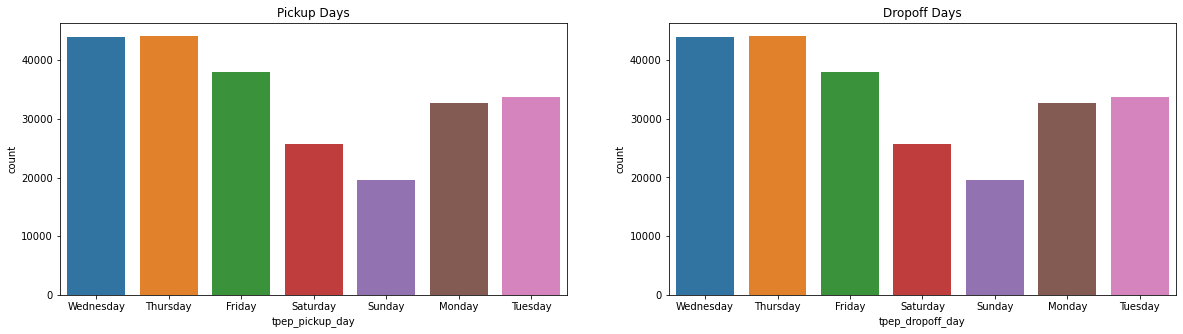

In [42]:
# trips per weekday
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
ax1.set_title('Pickup Days')
sns.countplot(x="tpep_pickup_day",data=df,ax=ax1)

ax2.set_title('Dropoff Days')
sns.countplot(x="tpep_dropoff_day",data=df,ax=ax2)

<AxesSubplot:title={'center':'Dropoff Days'}, xlabel='tpep_dropoff_day_numeric', ylabel='count'>

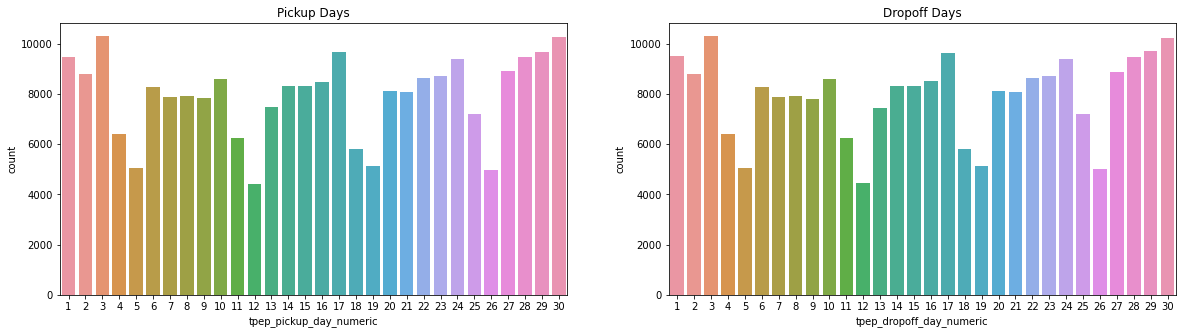

In [43]:
#trips per day
df_days = df.groupby(["tpep_pickup_day_numeric"]).mean()

figure, (ax3,ax4)=plt.subplots(ncols=2,figsize=(20,5))
ax3.set_title('Pickup Days')
sns.countplot(x="tpep_pickup_day_numeric",data=df,ax=ax3)
ax4.set_title('Dropoff Days')
sns.countplot(x="tpep_dropoff_day_numeric",data=df,ax=ax4)

<AxesSubplot:title={'center':'Dropoff Days'}, xlabel='tpep_dropoff_hour', ylabel='count'>

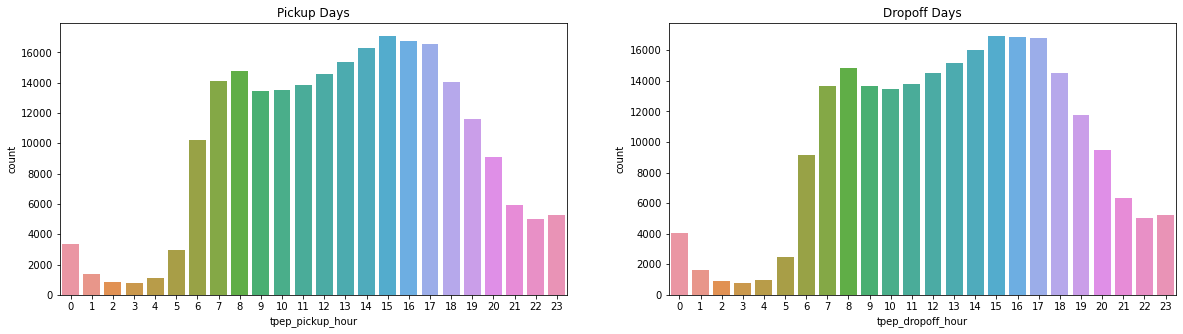

In [44]:
#trips per hour
figure,(ax5,ax6)=plt.subplots(ncols=2,figsize=(20,5))
ax5.set_title('Pickup Days')
sns.countplot(x="tpep_pickup_hour",data=df,ax=ax5)
ax6.set_title('Dropoff Days')
sns.countplot(x="tpep_dropoff_hour",data=df,ax=ax6)

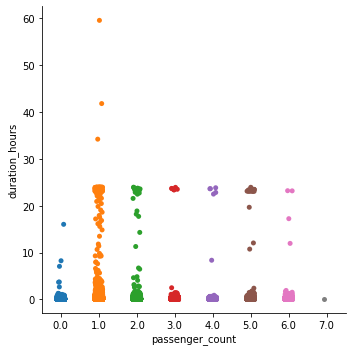

In [45]:
#duration/passenger_count
sns.catplot(y="duration_hours",x="passenger_count",data=df,kind="strip")

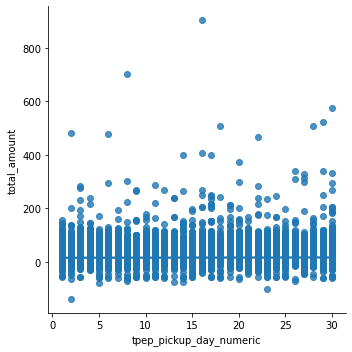

In [46]:
# days/total
sns.lmplot(data=df, x="tpep_pickup_day_numeric", y="total_amount")

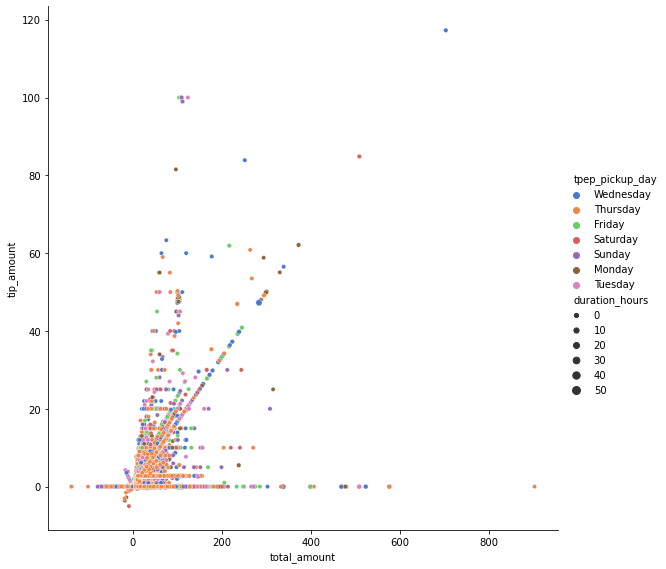

In [47]:
# total/tip/duration
sns.relplot(x="total_amount", y="tip_amount", size="duration_hours", hue="tpep_pickup_day",
            alpha=0.99,
            palette="muted",
            height=8,
            data=df)

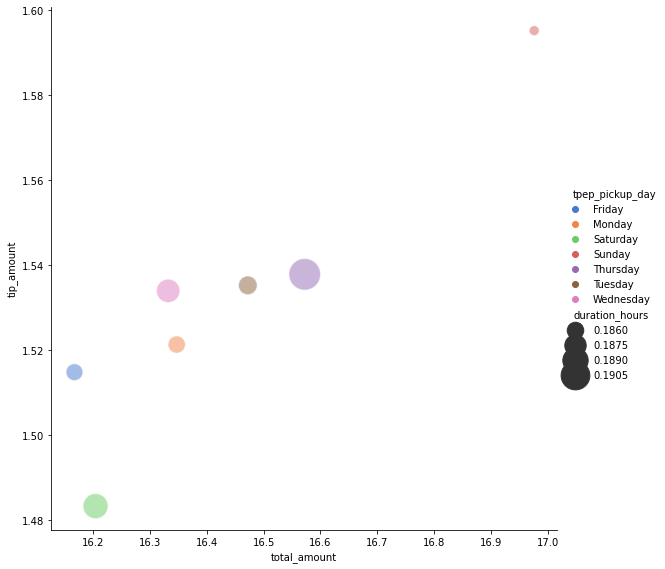

In [48]:
# total/tip/bin_duration (mean)
df_week_days = df.groupby(["tpep_pickup_day"]).mean()

sns.relplot(x="total_amount", y="tip_amount", size="duration_hours", hue="tpep_pickup_day",  sizes=(100,1000),          alpha=0.5,  palette="muted",height=8,data=df_week_days)

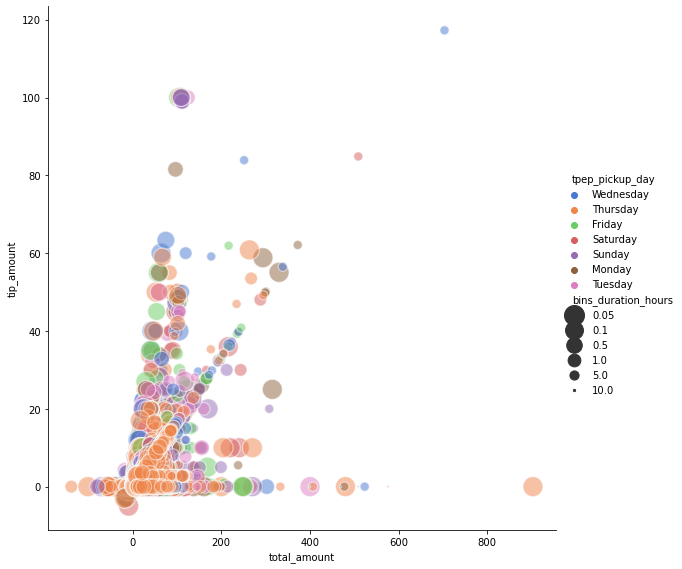

In [49]:
# total/tip/bin_duration
sns.relplot(x="total_amount", y="tip_amount", size="bins_duration_hours", hue="tpep_pickup_day",  sizes=(5,400),          alpha=0.5,  palette="muted",height=8,data=df)

In [50]:
# DOLocationID/PULocationID + duration or time

In [51]:
# tip/Location
#sns.scatterplot(data=df, x="PULocationID", y="tip_amount")

In [52]:
# tip/fare_amount
#sns.scatterplot(data=df, x="fare_amount", y="tip_amount")